# 測定条件  

ACモード  

V = 1.2  

A=0.25あたり?  

スケール:50mV   

positionずらし　div=-10 → -500mV  

↑これでほぼ中心点にくる  

time scale : 200ms →4s分のデータを取れる


In [68]:
from modules.load import *
from modules.lstm import *

In [69]:
#学習用データ
df_yubi = load("data_kai/yubi.csv").iloc[7:,:]
df_table = load("data_kai/table.csv").iloc[7:,:]
df_isu = load("data_kai/chair.csv").iloc[7:,:]
df_petto = load("data_kai/pet.csv").iloc[7:,:]
df_dan = load("data_kai/dan.csv").iloc[7:,:]
df_gam = load("data_kai/gam.csv").iloc[7:,:]

In [70]:
#テスト用データ
df_yubitest= load("data_kai/yubitest.csv").iloc[7:,:]
df_tabletest = load("data_kai/tabletest.csv").iloc[7:,:]
df_isutest = load("data_kai/chairtest.csv").iloc[7:,:]
df_pettotest = load("data_kai/pettest.csv").iloc[7:,:]
df_dantest = load("data_kai/dantest.csv").iloc[7:,:]
df_gamtest = load("data_kai/gamtest.csv").iloc[7:,:]

In [71]:
sns.set()

In [72]:
df_gam

,Channel :,CH1
7,1,-19.531250
8,2,-19.531250
9,3,-21.484375
10,4,-19.531250
11,5,-21.484375
...,...,...
10002,9996,-13.671875
10003,9997,-13.671875
10004,9998,-13.671875
10005,9999,-17.578125


# 注意
CH1は尺度50mVでdiv=-11:10メモリ下にずらしたグラフなので本当の値より500mV低く出ている。
そのため、500mVを足してあげなければならない！

In [73]:
#学習用データ
x_yubi , y_yubi = get_xy(df_yubi)
x_table , y_table = get_xy(df_table)
x_gam , y_gam = get_xy(df_gam)
x_isu , y_isu = get_xy(df_isu)
x_dan , y_dan = get_xy(df_dan)
x_petto , y_petto = get_xy(df_petto)

data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data


In [74]:
#テストデータ
x_yubitest , y_yubitest = get_xy(df_yubitest)
x_tabletest , y_tabletest = get_xy(df_tabletest)
x_gamtest , y_gamtest = get_xy(df_gamtest)
x_isutest , y_isutest= get_xy(df_isutest)
x_dantest , y_dantest = get_xy(df_dantest)
x_pettotest , y_pettotest = get_xy(df_pettotest)

data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data


In [75]:
y_yubi.shape

(10000,)

In [76]:
y_yubi

7          0.000000
8          0.000000
9          1.953125
10         1.953125
11         1.953125
            ...    
10002    -35.156250
10003    -35.156250
10004    -37.109375
10005    -35.156250
10006    -37.109375
Name: CH1, Length: 10000, dtype: object

## 10000→1000(1メモリ400us→1メモリ4msに変換)

In [77]:
def down_sampling(y, scale):  # y must series data =>pdの一次元データ (n,)
    yy = np.array(y)  # pandas.core.series.Series to
    yyy = yy.astype("float64")
    y_down = signal.decimate(yyy,10)
    return y_down
def plot_time(y,height,width):
    plt.figure(figsize=(width,height))
    x = np.arange(0,4000,4)
    plt.plot(x, y, color="b", label="row_data")
    plt.ylim(400,600)
    plt.xlabel("time [ms]")
    plt.ylabel("voltage [mV]")
    plt.show()

In [78]:
#指のデータ
y_yubi = down_sampling(y_yubi,10)
y_yubi +=500

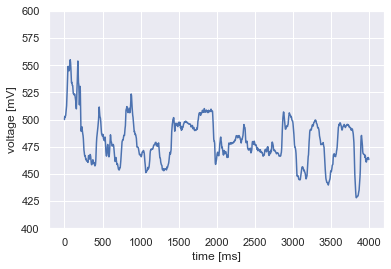

In [79]:
plot_time(y_yubi,4,6)

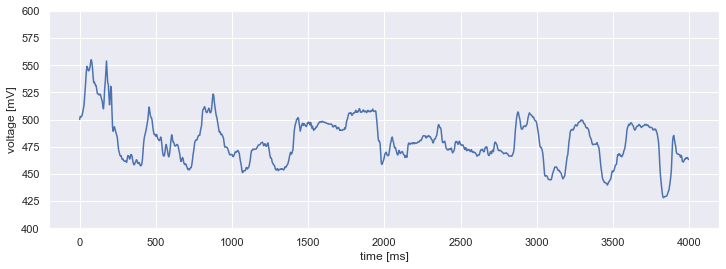

In [80]:
plot_time(y_yubi,4,12)

In [81]:
y_yubi.shape

(1000,)

In [82]:
y_yubi.mean()

480.6960212447879

In [83]:
#指のテストデータ
y_yubitest = down_sampling(y_yubitest,10)
y_yubitest +=500

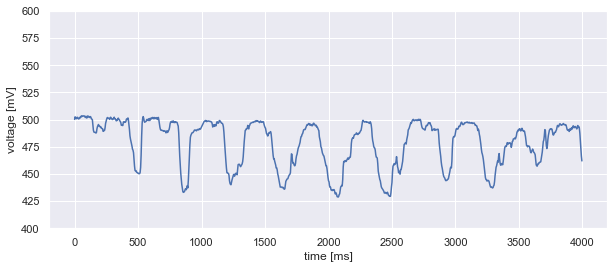

In [84]:
plot_time(y_yubitest,4,10)

In [85]:
#テーブルの波形
y_table= down_sampling(y_table ,10)
y_table +=500

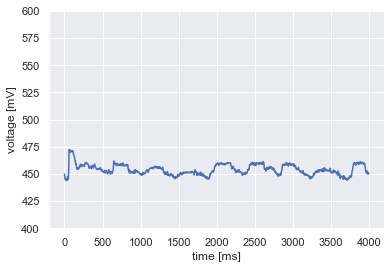

In [86]:
plot_time(y_table,4,6)

In [87]:
#テーブルのテストデータ
y_tabletest = down_sampling(y_tabletest,10)
y_tabletest +=500

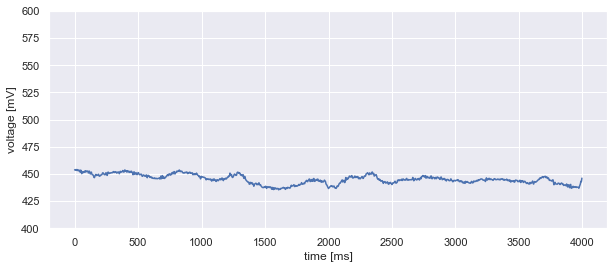

In [88]:
plot_time(y_tabletest,4,10)

In [23]:
y_table.shape

(1000,)

In [24]:
y_table.mean()

453.9195540354227

In [89]:
#椅子の波形
y_isu = down_sampling(y_isu,10)
y_isu +=500

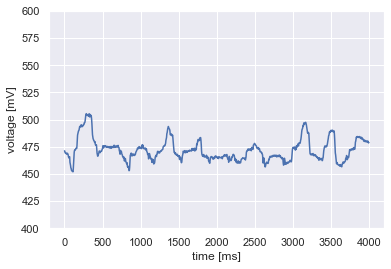

In [90]:
plot_time(y_isu,4,6)

In [27]:
y_isu.shape

(1000,)

In [28]:
y_isu.mean()

471.8239419898087

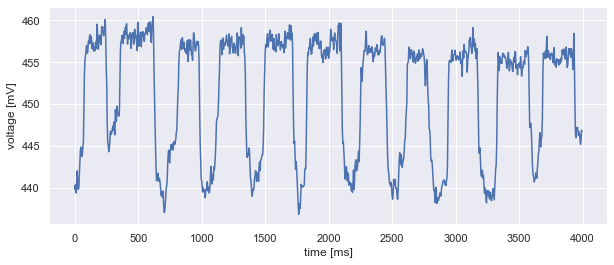

In [29]:
#椅子のテストデータ
y_isutest = down_sampling(y_isutest,10)
y_isutest +=500
plot_time(y_isutest,4,10)

In [91]:
#ガムテープの波形
y_gam = down_sampling(y_gam,10)
y_gam +=500

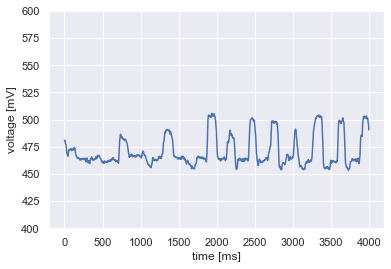

In [92]:
plot_time(y_gam,4,6)

In [32]:
y_gam.shape

(1000,)

In [33]:
y_gam.mean()

470.8883738330581

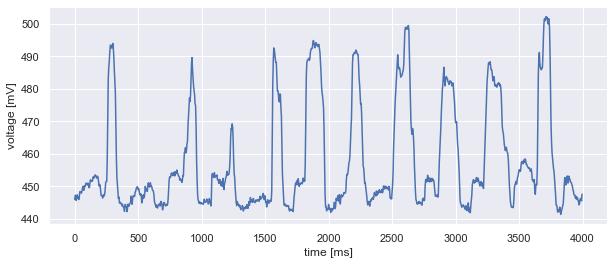

In [34]:
#ガムテープのテストデータ
y_gamtest = down_sampling(y_gamtest,10)
y_gamtest +=500
plot_time(y_gamtest,4,10)

In [93]:
#段ボールの波形
y_dan = down_sampling(y_dan,10)
y_dan +=500

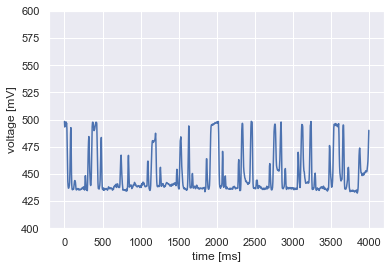

In [94]:
plot_time(y_dan,4,6)

In [37]:
y_dan.shape

(1000,)

In [38]:
y_dan.mean()

449.04526380714316

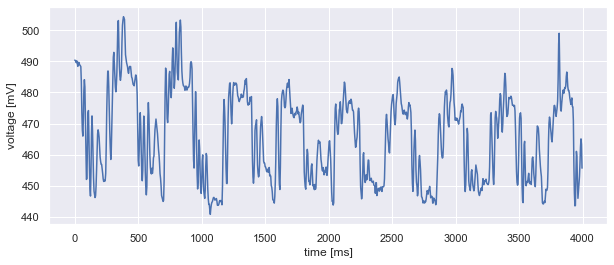

In [39]:
#ダンボールのテストデータ
y_dantest = down_sampling(y_dantest,10)
y_dantest +=500

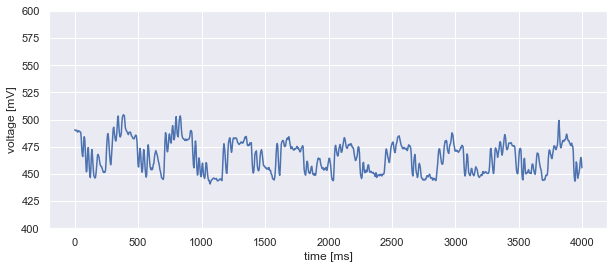

In [48]:
plot_time(y_dantest,4,10)

In [95]:
#ペットボトルの波形
y_petto = down_sampling(y_petto,10)
y_petto +=500

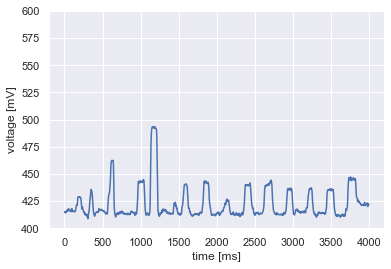

In [96]:
plot_time(y_petto,4,6)

In [41]:
y_petto.shape

(1000,)

In [42]:
y_petto.mean()

422.57662942493823

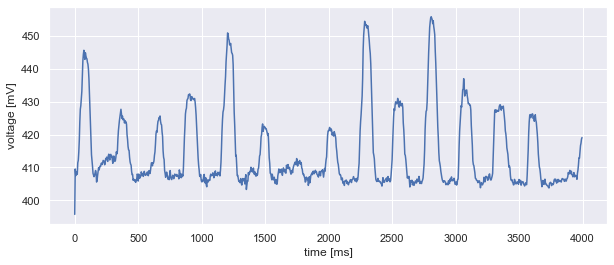

In [43]:
#ペットボトルのテストデータ
y_pettotest = down_sampling(y_pettotest,10)
y_pettotest +=500
plot_time(y_pettotest,4,10)

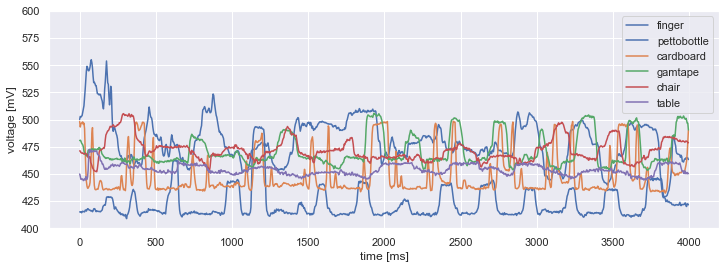

In [57]:
plt.figure(figsize=(12,4))
x = np.arange(0,4000,4)
plt.plot(x, y_yubi, color="b", label="finger")
plt.plot(x, y_petto, label="pettobottle")
plt.plot(x, y_dan, label="cardboard")
plt.plot(x, y_gam, label="gamtape")
plt.plot(x, y_isu, label="chair")
plt.plot(x, y_table, label="table")
plt.ylim(400,600)
plt.xlabel("time [ms]")
plt.ylabel("voltage [mV]")
plt.legend()
plt.show()

In [288]:
y_yubi

array([500.04949361, 502.86020965, 502.21831724, 502.94198521,
       503.69376133, 506.80492827, 509.75455365, 512.64274212,
       519.47670292, 527.53182609, 536.331462  , 544.72374254,
       548.98747529, 547.63961662, 545.05894833, 544.79030551,
       545.88185585, 548.36340314, 552.69757702, 554.99967208,
       552.36321529, 547.45631592, 539.69963366, 533.91061296,
       534.32606917, 533.12377096, 531.28554698, 531.19424427,
       527.36432588, 523.89232537, 523.81455066, 523.05648268,
       522.59371957, 523.37700839, 523.13839243, 520.93887543,
       518.76327964, 517.00114287, 512.53096149, 509.82361884,
       516.78969452, 528.10393556, 534.75044894, 544.65813771,
       553.84547171, 543.88998119, 533.87708302, 532.35074326,
       521.48103815, 513.51587419, 519.83942463, 530.55337693,
       526.84483544, 507.21566366, 492.33173697, 489.19774061,
       491.84283562, 493.39397079, 491.1410938 , 488.66724801,
       486.90283788, 485.27448565, 482.2893982 , 476.18

In [98]:
## 標準化　　downsamplingはstandardscalerの後にはできない

In [99]:
#学習データに関して
#numpyに変換
y_yubi = np.array(y_yubi).reshape(-1,1)
y_table = np.array(y_table).reshape(-1,1)
y_gam = np.array(y_gam).reshape(-1,1)
y_isu = np.array(y_isu).reshape(-1,1)
y_dan = np.array(y_dan).reshape(-1,1)
y_petto = np.array(y_petto).reshape(-1,1)

In [100]:
#標準化
y_yubi = scale(y_yubi)
y_table = scale(y_table)
y_gam = scale(y_gam)
y_isu = scale(y_isu)
y_dan= scale(y_dan)
y_petto = scale(y_petto)

In [101]:
a,y_yubi = np.array(y_yubi)
b,y_table = np.array(y_table)
c,y_gam = np.array(y_gam)
d,y_isu = np.array(y_isu)
e,y_dan = np.array(y_dan)
f,y_petto = np.array(y_petto)

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

In [102]:
y_yubi.mean()

0   -1.278977e-15
dtype: float64

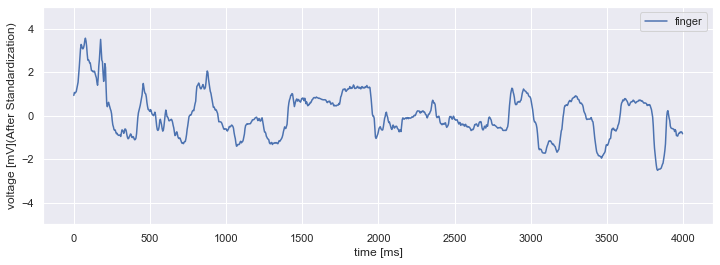

In [104]:
plt.figure(figsize=(12,4))
x = np.arange(0,4000,4)
plt.plot(x, y_yubi, color="b", label="finger")
plt.ylim(-5,5)
plt.xlabel("time [ms]")
plt.ylabel("voltage [mV](After Standardization)")
plt.legend()
plt.show()

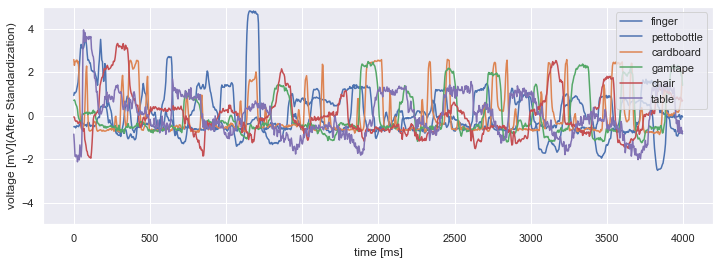

In [103]:
plt.figure(figsize=(12,4))
x = np.arange(0,4000,4)
plt.plot(x, y_yubi, color="b", label="finger")
plt.plot(x, y_petto, label="pettobottle")
plt.plot(x, y_dan, label="cardboard")
plt.plot(x, y_gam, label="gamtape")
plt.plot(x, y_isu, label="chair")
plt.plot(x, y_table, label="table")
plt.ylim(-5,5)
plt.xlabel("time [ms]")
plt.ylabel("voltage [mV](After Standardization)")
plt.legend()
plt.show()

In [295]:
#テストデータに関して
#numpyに変換
y_yubitest = np.array(y_yubitest).reshape(-1,1)
y_tabletest = np.array(y_tabletest).reshape(-1,1)
y_gamtest = np.array(y_gamtest).reshape(-1,1)
y_isutest = np.array(y_isutest).reshape(-1,1)
y_dantest = np.array(y_dantest).reshape(-1,1)
y_pettotest = np.array(y_pettotest).reshape(-1,1)

In [296]:
#標準化
y_yubitest = scale(y_yubitest)
y_tabletest = scale(y_tabletest)
y_gamtest = scale(y_gamtest)
y_isutest = scale(y_isutest)
y_dantest= scale(y_dantest)
y_pettotest = scale(y_pettotest)

In [297]:
a,y_yubitest = np.array(y_yubitest)
b,y_tabletest = np.array(y_tabletest)
c,y_gamtest = np.array(y_gamtest)
d,y_isutest = np.array(y_isutest)
e,y_dantest = np.array(y_dantest)
f,y_pettotest= np.array(y_pettotest)

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

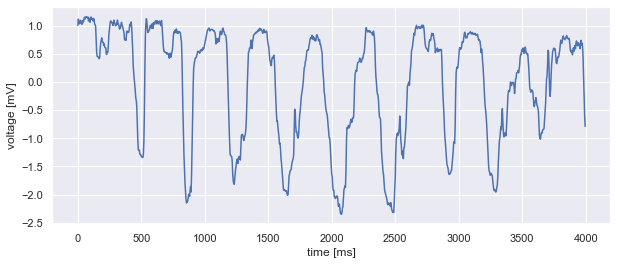

In [298]:
plot_time(y_yubitest,4,10)

In [299]:
y_yubitest.mean()

0   -1.534772e-15
dtype: float64

## データセットの生成

In [300]:
#指のデータセット
data_yubi,label_yubi = make_dataset(y_yubi)

timesteps:


ValueError: invalid literal for int() with base 10: ''

In [48]:
label_yubi = label_yubi.reshape(-1,1)

In [140]:
#指のテストデータ
data_yubitest,label_yubitest = make_dataset(y_yubitest)

timesteps:100
label_num:0


In [142]:
label_yubitest = label_yubitest.reshape(-1,1)

In [49]:
#テーブルのデータセット
data_table,label_table = make_dataset(y_table)

timesteps:100
label_num:1


In [50]:
label_table = label_table.reshape(-1,1)

In [141]:
#テーブルのテストデータ
data_tabletest,label_tabletest = make_dataset(y_tabletest)

timesteps:100
label_num:1


In [143]:
label_tabletest = label_tabletest.reshape(-1,1)

In [52]:
#椅子のデータセット
data_isu,label_isu = make_dataset(y_isu)

timesteps:100
label_num:2


In [53]:
label_isu = label_isu.reshape(-1,1)

In [147]:
#椅子のデータセット
data_isu,label_isu = make_dataset(y_isu)

timesteps:100
label_num:2


In [148]:
label_isu = label_isu.reshape(-1,1)

In [144]:
#椅子のテストデータセット
data_isutest,label_isutest = make_dataset(y_isutest)

timesteps:100
label_num:2


In [145]:
label_isutest = label_isutest.reshape(-1,1)

In [54]:
#ガムテープのデータセット
data_gam,label_gam = make_dataset(y_gam)

timesteps:100
label_num:3


In [55]:
label_gam = label_gam.reshape(-1,1)

In [149]:
#ガムテープのテストデータセット
data_gamtest,label_gamtest = make_dataset(y_gamtest)

timesteps:100
label_num:3


In [150]:
label_gamtest = label_gamtest.reshape(-1,1)

In [56]:
#段ボールのデータセット
data_dan,label_dan = make_dataset(y_dan)

timesteps:100
label_num:4


In [57]:
label_dan = label_dan.reshape(-1,1)

In [151]:
#段ボールのテストデータセット
data_dantest,label_dantest = make_dataset(y_dantest)

timesteps:100
label_num:4


In [152]:
label_dantest = label_dantest.reshape(-1,1)

In [58]:
#ペットボトルのデータセット
data_petto,label_petto = make_dataset(y_petto)

timesteps:100
label_num:5


In [59]:
label_petto = label_petto.reshape(-1,1)

In [153]:
#ペットボトルのテストデータセット
data_pettotest,label_pettotest = make_dataset(y_pettotest)

timesteps:100
label_num:5


In [154]:
label_pettotest = label_pettotest.reshape(-1,1)

In [60]:
data_petto.shape

(900, 100, 1)

In [61]:
label_petto.shape

(900, 1)

# データセットの合成

## 波形データの生成

In [62]:
#学習用データ
data1 = merge_data(data_table,data_isu)
data2  =merge_data(data_gam,data_yubi)
data3 = merge_data(data_dan,data_petto)

In [63]:
data12 = merge_data(data1,data2)

In [64]:
data123 = merge_data(data12,data3)

In [65]:
data123.shape

(5400, 100, 1)

In [66]:
data_csv = pd.DataFrame(data123.reshape(-1,100))

In [67]:
#取り出すときはnumpy.arrrayしてreshape(-1,100,1)する
data_csv.to_csv("6波形.csv")

In [388]:
data123 = pd.read_csv("6波形.csv")

In [389]:
data123 = np.array(data123.iloc[:,1:]).reshape(-1,100,1)

In [390]:
data123.shape

(5400, 100, 1)

In [391]:
data123

array([[[-0.85580624],
        [-1.31338982],
        [-1.87228723],
        ...,
        [ 0.70252783],
        [ 1.0465459 ],
        [ 1.09258126]],

       [[-1.31338982],
        [-1.87228723],
        [-1.89665932],
        ...,
        [ 1.0465459 ],
        [ 1.09258126],
        [ 0.94373118]],

       [[-1.87228723],
        [-1.89665932],
        [-1.81589628],
        ...,
        [ 1.09258126],
        [ 0.94373118],
        [ 0.70506727]],

       ...,

       [[-0.75824277],
        [-0.68704427],
        [-0.68440496],
        ...,
        [ 0.04940307],
        [-0.13143737],
        [-0.17402347]],

       [[-0.68704427],
        [-0.68440496],
        [-0.68753273],
        ...,
        [-0.13143737],
        [-0.17402347],
        [-0.00882672]],

       [[-0.68440496],
        [-0.68753273],
        [-0.70191868],
        ...,
        [-0.17402347],
        [-0.00882672],
        [-0.01101767]]])

In [392]:
#テスト用データ
data11 = merge_data(data_tabletest,data_isutest)
data22  =merge_data(data_gamtest,data_yubitest)
data33 = merge_data(data_dantest,data_pettotest)

In [393]:
data1122 = merge_data(data11,data22)

In [394]:
data112233 = merge_data(data1122,data33)

In [395]:
data112233.shape

(5400, 100, 1)

In [396]:
data_test_csv = pd.DataFrame(data112233.reshape(-1,100))

In [397]:
#取り出すときはnumpy.arrrayしてreshape(-1,100,1)する
data_test_csv.to_csv("6波形_test.csv")

In [398]:
data112233 = pd.read_csv("6波形_test.csv")

In [399]:
data112233 = np.array(data112233.iloc[:,1:]).reshape(-1,100,1)

In [400]:
data112233

array([[[ 2.01771026],
        [ 2.07395833],
        [ 1.99031688],
        ...,
        [ 1.52284884],
        [ 1.73863892],
        [ 2.02153228]],

       [[ 2.07395833],
        [ 1.99031688],
        [ 2.10332502],
        ...,
        [ 1.73863892],
        [ 2.02153228],
        [ 1.72482769]],

       [[ 1.99031688],
        [ 2.10332502],
        [ 1.9029823 ],
        ...,
        [ 2.02153228],
        [ 1.72482769],
        [ 1.77119827]],

       ...,

       [[ 0.98082095],
        [ 0.89947118],
        [ 0.97473374],
        ...,
        [-0.14866103],
        [ 0.01658295],
        [ 0.1742822 ]],

       [[ 0.89947118],
        [ 0.97473374],
        [ 0.95202775],
        ...,
        [ 0.01658295],
        [ 0.1742822 ],
        [ 0.24026449]],

       [[ 0.97473374],
        [ 0.95202775],
        [ 0.99943264],
        ...,
        [ 0.1742822 ],
        [ 0.24026449],
        [ 0.34743287]]])

## ラベルデータ の生成

In [68]:
#学習用データ
label1 = np.vstack((label_table,label_isu))
label2 = np.vstack((label_gam,label_yubi))
label3 = np.vstack((label_dan,label_petto))

In [69]:
label2.shape

(1800, 1)

In [70]:
label12 = np.vstack((label1,label2))

In [71]:
label12.shape

(3600, 1)

In [72]:
label123 = np.vstack((label12,label3))

In [73]:
label123.shape

(5400, 1)

In [74]:
label_csv = pd.DataFrame(label123)

In [75]:
# 取り出したらone-hotする
label_csv.to_csv("6波形ラベル.csv")

In [332]:
label123 = pd.read_csv("6波形ラベル.csv")

In [333]:
label123 = np.array(label123.iloc[:,1])

In [334]:
label123

array([1, 1, 1, ..., 5, 5, 5])

In [335]:
label =one_hot(label123)

In [336]:
label.shape

(5400, 6)

In [161]:
#テストデータ
label11 = np.vstack((label_tabletest,label_isutest))
label22 = np.vstack((label_gamtest,label_yubitest))
label33 = np.vstack((label_dantest,label_pettotest))

In [162]:
label1122 = np.vstack((label11,label22))

In [165]:
label112233 = np.vstack((label1122,label33))

In [166]:
label112233.shape

(5400, 1)

In [169]:
label_test_csv = pd.DataFrame(label112233)

In [170]:
# 取り出したらone-hotする
label_test_csv.to_csv("6波形ラベル_test.csv")

In [172]:
label_test =one_hot(label112233)

In [173]:
label_test.shape

(5400, 6)

## トレインデータとテストデータに分割

In [341]:
X_train, X_test, Y_train, Y_test = split(data123,label)

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [342]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [343]:
X_train.shape[2]

1

# モデルの生成

In [81]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
BATCHSIZE = 32
UNITNUM   = 128
optimizer = RMSprop()
model = Sequential()
model.add(LSTM(UNITNUM, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation("softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
_________________________________________________________________
activation (Activation)      (None, 6)                 0         
Total params: 67,334
Trainable params: 67,334
Non-trainable params: 0
_________________________________________________________________


In [433]:
from tensorflow.keras.layers import Bidirectional,LSTM,TimeDistributed

# bidirectional lstm
組み方↓  

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional  　　

詳しい説明↓　　

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/#:~:text=Bidirectional%20LSTMs%20are%20an%20extension,LSTMs%20on%20the%20input%20sequence.

In [355]:
model2 = Sequential()
model2.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(32,return_sequences=False)))
model2.add(Dropout(0.3))
model2.add(Dense(6))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics = ['accuracy'])
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_21 (Bidirectio (None, 100, 64)           8704      
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 64)           0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
_________________________________________________________________
activation_11 (Activation)   (None, 6)                 0         
Total params: 33,926
Trainable params: 33,926
Non-trainable params: 0
_________________________________________________

In [356]:
es = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

In [84]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=30,validation_split=0.2,callbacks=es)

Epoch 1/30
346/346 [==============================] - 13s 38ms/step - loss: 1.6818 - accuracy: 0.2361 - val_loss: 1.5001 - val_accuracy: 0.3113
Epoch 2/30
346/346 [==============================] - 13s 36ms/step - loss: 1.4212 - accuracy: 0.3383 - val_loss: 1.3741 - val_accuracy: 0.3241
Epoch 3/30
346/346 [==============================] - 13s 37ms/step - loss: 1.2582 - accuracy: 0.4138 - val_loss: 1.0808 - val_accuracy: 0.4850
Epoch 4/30
346/346 [==============================] - 12s 35ms/step - loss: 1.0485 - accuracy: 0.5211 - val_loss: 1.1338 - val_accuracy: 0.5150
Epoch 5/30
346/346 [==============================] - 12s 35ms/step - loss: 0.9458 - accuracy: 0.5799 - val_loss: 0.9813 - val_accuracy: 0.5683
Epoch 6/30
346/346 [==============================] - 12s 34ms/step - loss: 0.8365 - accuracy: 0.6574 - val_loss: 0.8166 - val_accuracy: 0.6713
Epoch 7/30
346/346 [==============================] - 12s 36ms/step - loss: 0.6819 - accuracy: 0.7376 - val_loss: 0.5298 - val_accuracy:

In [357]:
history2=model2.fit(X_train, Y_train, batch_size=10, epochs=30,validation_split=0.2,callbacks=es)

Epoch 1/30
346/346 [==============================] - 25s 72ms/step - loss: 1.6616 - accuracy: 0.2627 - val_loss: 1.4693 - val_accuracy: 0.3472
Epoch 2/30
346/346 [==============================] - 25s 72ms/step - loss: 1.3207 - accuracy: 0.4031 - val_loss: 1.2025 - val_accuracy: 0.4502
Epoch 3/30
346/346 [==============================] - 24s 71ms/step - loss: 1.1613 - accuracy: 0.4800 - val_loss: 1.1352 - val_accuracy: 0.4757
Epoch 4/30
346/346 [==============================] - 25s 73ms/step - loss: 1.0154 - accuracy: 0.5718 - val_loss: 1.2102 - val_accuracy: 0.4641
Epoch 5/30
346/346 [==============================] - 25s 72ms/step - loss: 0.9029 - accuracy: 0.6421 - val_loss: 0.9592 - val_accuracy: 0.6181
Epoch 6/30
346/346 [==============================] - 25s 72ms/step - loss: 0.7434 - accuracy: 0.7124 - val_loss: 0.6424 - val_accuracy: 0.7199
Epoch 7/30
346/346 [==============================] - 25s 72ms/step - loss: 0.6498 - accuracy: 0.7572 - val_loss: 0.5734 - val_accuracy:

In [86]:
history.history["loss"]

[1.6818196773529053,
 1.4212406873703003,
 1.2582403421401978,
 1.0484951734542847,
 0.9457775950431824,
 0.8365481495857239,
 0.6818810105323792,
 0.5473993420600891,
 0.44428369402885437,
 0.33936628699302673,
 0.36743709444999695,
 0.2602689266204834,
 0.26162010431289673,
 0.1964813470840454,
 0.20313939452171326,
 0.1745125651359558,
 0.12409643828868866,
 0.11316943168640137]

In [358]:
history2.history["loss"]

[1.6616454124450684,
 1.3206934928894043,
 1.161313772201538,
 1.0154006481170654,
 0.9029034972190857,
 0.7434238195419312,
 0.6498458981513977,
 0.558617889881134,
 0.46750321984291077,
 0.3868723213672638,
 0.3431227207183838,
 0.3386770188808441,
 0.3066313564777374,
 0.27993083000183105,
 0.23443928360939026,
 0.18003427982330322,
 0.17495355010032654,
 0.14999191462993622,
 0.14262878894805908,
 0.12654346227645874,
 0.1663816273212433,
 0.10641808062791824,
 0.14422976970672607,
 0.08371376991271973,
 0.10641320794820786]

In [359]:
def plot_history(history):
    # model loss graph

    def plot_history_loss(fit):
        axL.plot(fit.history['loss'], label="loss for training")
        axL.plot(fit.history['val_loss'],label="loss for validation")
        axL.set_title('model loss')
        axL.set_xlabel('epoch')
        axL.set_ylabel('loss')
        axL.legend(loc='upper right')

    # model accuracy graph

    def plot_history_accuracy(fit):
        axR.plot(fit.history['accuracy'],
                 label="accuracy for training")
        axR.plot(fit.history['val_accuracy'],label="accuracy for validation")
        axR.set_title('model accuracy')
        axR.set_xlabel('epoch')
        axR.set_ylabel('accuracy')
        axR.legend(loc='lower right')

    ig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.5)
    plot_history_loss(history)
    plot_history_accuracy(history)

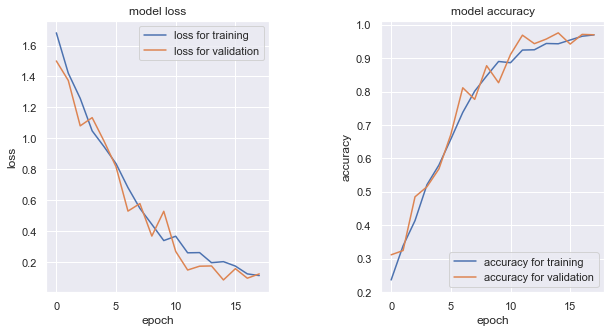

In [88]:
plot_history(history)

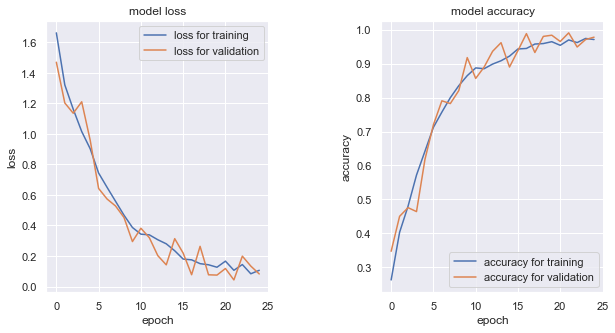

In [361]:
plot_history(history2)

In [89]:
model.save( "model.h5" )

In [90]:
model.save_weights("model_weight.h5")

In [364]:
model2.save("model_bi.h5")

In [365]:
model2.save_weights("model_weight_bi.h5")

In [91]:
evaluate_model(model,X_test,Y_test)

34/34 [==============================] - 0s 14ms/step - loss: 0.1393 - accuracy: 0.9704
loss: 0.13930998742580414 accuracy: 0.970370352268219


In [366]:
evaluate_model(model2,X_test,Y_test)

34/34 [==============================] - 1s 15ms/step - loss: 0.0600 - accuracy: 0.9833
loss: 0.06001734733581543 accuracy: 0.9833333492279053


In [367]:
pred = model.predict(X_test)

In [368]:
pred.shape

(1080, 6)

In [369]:
y_pred = np.argmax(pred,axis=1)

In [370]:
y_pred

array([3, 2, 0, ..., 0, 1, 5])

In [371]:
Y_acc = np.argmax(Y_test,axis=1)

In [372]:
Y_acc

array([3, 2, 0, ..., 0, 1, 5])

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [99]:
cf_matrix = confusion_matrix(Y_acc, y_pred)

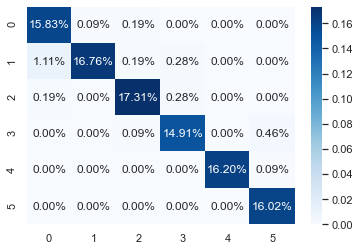

In [100]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [101]:
class_names = ["finger","table","chaIr","gamtape","cardboard","petbottle"]

In [102]:
cd_df = pd.DataFrame(cf_matrix)

In [103]:
cd_df

,0,1,2,3,4,5
0,171,1,2,0,0,0
1,12,181,2,3,0,0
2,2,0,187,3,0,0
3,0,0,1,161,0,5
4,0,0,0,0,175,1
5,0,0,0,0,0,173


In [104]:
cd_df.columns=class_names
cd_df.index=class_names

In [105]:
cd_df

,finger,table,chaIr,gamtape,cardboard,petbottle
finger,171,1,2,0,0,0
table,12,181,2,3,0,0
chaIr,2,0,187,3,0,0
gamtape,0,0,1,161,0,5
cardboard,0,0,0,0,175,1
petbottle,0,0,0,0,0,173


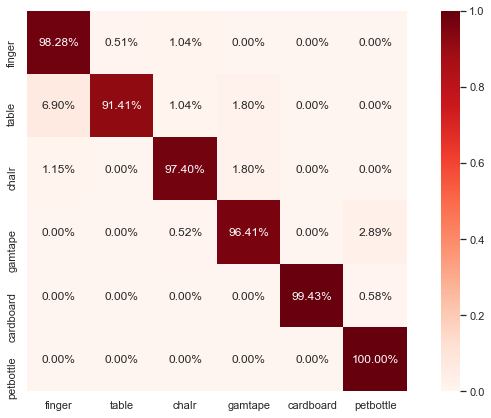

In [106]:
plt.figure(figsize = (12,7))
sns.heatmap(cd_df.astype('float') / cd_df.sum(axis=1), annot=True, fmt='.2%' ,square = True,cmap='Reds')
plt.show()

In [107]:
X_test

array([[[ 0.30284908],
        [ 0.4072647 ],
        [ 0.94531655],
        ...,
        [-1.0125144 ],
        [-0.9791803 ],
        [-0.95858735]],

       [[ 0.20263769],
        [ 0.2137742 ],
        [ 0.29337093],
        ...,
        [ 0.23488623],
        [ 0.3222409 ],
        [ 0.22415899]],

       [[ 1.2688236 ],
        [ 1.3328629 ],
        [ 1.3404477 ],
        ...,
        [ 0.03324265],
        [ 0.11165532],
        [ 0.16973743]],

       ...,

       [[-0.40583527],
        [-0.41121957],
        [-0.4899297 ],
        ...,
        [ 1.0292237 ],
        [ 1.1259044 ],
        [ 1.2188815 ]],

       [[ 0.4882474 ],
        [ 0.7025278 ],
        [ 1.0465459 ],
        ...,
        [ 0.7956283 ],
        [ 0.80028975],
        [ 0.8099624 ]],

       [[-0.5536344 ],
        [-0.6340407 ],
        [-0.7268704 ],
        ...,
        [-0.72192144],
        [-0.6913878 ],
        [-0.6454035 ]]], dtype=float32)

## モデルの再利用

In [108]:
# import kerasだと環境違いでエラーになるのでtensorflowをつける

In [109]:
from tensorflow.keras.models import load_model

In [110]:
ls

6波形.csv               images/                 modules/
6波形ラベル.csv         lablab.ipynb            sincos分類.ipynb
README.md               main.py                 souzai.ipynb
concat_data.csv         model.h5                weights.hdf5
data/                   model.hdf5              惣菜.xlsx
data_kai/               model.json              時系列6種類.ipynb
data_kai_だめ/          model_weight.h5         発表用データ/


In [111]:
model.save("model.hdf5")
model.save_weights('weights.hdf5')#作成したモデルが学習した重みを保存

In [112]:
model_recicle=load_model("model.hdf5")
model_recicle.load_weights('weights.hdf5')#作成したモデルが学習した重みを読み込み

In [113]:
evaluate_model(model_recicle,X_test,Y_test)

34/34 [==============================] - 0s 14ms/step - loss: 0.1393 - accuracy: 0.9704
loss: 0.13930998742580414 accuracy: 0.970370352268219


In [374]:
#bidirectionalについて
model_bi = load_model("model_bi.h5")
model_bi.load_weights("model_weight_bi.h5")

In [375]:
evaluate_model(model_bi,X_test,Y_test)

34/34 [==============================] - 1s 15ms/step - loss: 0.0600 - accuracy: 0.9833
loss: 0.06001734733581543 accuracy: 0.9833333492279053


# 知らない波形についても正答できるか?

In [401]:
X_train_kai, X_test_kai, Y_train_kai, Y_test_kai = split(data112233,label_test)

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [188]:
history = model_recicle.fit(X_train_kai, Y_train_kai, batch_size=10, epochs=30,validation_split=0.2,callbacks=es)a

Epoch 1/30
216/216 [==============================] - 6s 29ms/step - loss: 0.8358 - accuracy: 0.7241 - val_loss: 0.3626 - val_accuracy: 0.8556
Epoch 2/30
216/216 [==============================] - 6s 28ms/step - loss: 0.4519 - accuracy: 0.8542 - val_loss: 0.2942 - val_accuracy: 0.9056
Epoch 3/30
216/216 [==============================] - 6s 28ms/step - loss: 0.3246 - accuracy: 0.8921 - val_loss: 0.2480 - val_accuracy: 0.9241
Epoch 4/30
216/216 [==============================] - 6s 28ms/step - loss: 0.2207 - accuracy: 0.9347 - val_loss: 0.2595 - val_accuracy: 0.9296
Epoch 5/30
216/216 [==============================] - 6s 28ms/step - loss: 0.1752 - accuracy: 0.9514 - val_loss: 0.1600 - val_accuracy: 0.9444
Epoch 6/30
216/216 [==============================] - 6s 28ms/step - loss: 0.1389 - accuracy: 0.9611 - val_loss: 0.1832 - val_accuracy: 0.9426
Epoch 7/30
216/216 [==============================] - 6s 28ms/step - loss: 0.1188 - accuracy: 0.9699 - val_loss: 0.1737 - val_accuracy: 0.9481

In [402]:
data112233

array([[[ 2.01771026],
        [ 2.07395833],
        [ 1.99031688],
        ...,
        [ 1.52284884],
        [ 1.73863892],
        [ 2.02153228]],

       [[ 2.07395833],
        [ 1.99031688],
        [ 2.10332502],
        ...,
        [ 1.73863892],
        [ 2.02153228],
        [ 1.72482769]],

       [[ 1.99031688],
        [ 2.10332502],
        [ 1.9029823 ],
        ...,
        [ 2.02153228],
        [ 1.72482769],
        [ 1.77119827]],

       ...,

       [[ 0.98082095],
        [ 0.89947118],
        [ 0.97473374],
        ...,
        [-0.14866103],
        [ 0.01658295],
        [ 0.1742822 ]],

       [[ 0.89947118],
        [ 0.97473374],
        [ 0.95202775],
        ...,
        [ 0.01658295],
        [ 0.1742822 ],
        [ 0.24026449]],

       [[ 0.97473374],
        [ 0.95202775],
        [ 0.99943264],
        ...,
        [ 0.1742822 ],
        [ 0.24026449],
        [ 0.34743287]]])

In [387]:
data123

array([[[-0.85580624],
        [-1.31338982],
        [-1.87228723],
        ...,
        [ 0.70252783],
        [ 1.0465459 ],
        [ 1.09258126]],

       [[-1.31338982],
        [-1.87228723],
        [-1.89665932],
        ...,
        [ 1.0465459 ],
        [ 1.09258126],
        [ 0.94373118]],

       [[-1.87228723],
        [-1.89665932],
        [-1.81589628],
        ...,
        [ 1.09258126],
        [ 0.94373118],
        [ 0.70506727]],

       ...,

       [[-0.75824277],
        [-0.68704427],
        [-0.68440496],
        ...,
        [ 0.04940307],
        [-0.13143737],
        [-0.17402347]],

       [[-0.68704427],
        [-0.68440496],
        [-0.68753273],
        ...,
        [-0.13143737],
        [-0.17402347],
        [-0.00882672]],

       [[-0.68440496],
        [-0.68753273],
        [-0.70191868],
        ...,
        [-0.17402347],
        [-0.00882672],
        [-0.01101767]]])

In [405]:
evaluate_model(model,X_test_kai,Y_test_kai)

34/34 [==============================] - 1s 15ms/step - loss: 3.9914 - accuracy: 0.4093
loss: 3.9913651943206787 accuracy: 0.40925925970077515


In [404]:
#bidirectionalだと学習無しでかなり高い精度を叩き出せる！
evaluate_model(model2,X_test_kai,Y_test_kai)

34/34 [==============================] - 0s 14ms/step - loss: 4.8259 - accuracy: 0.4009
loss: 4.8258771896362305 accuracy: 0.4009259343147278


In [190]:
y_pred_kai = model_recicle(X_test_kai)

In [191]:
y_pred_kai

<tf.Tensor: shape=(2700, 6), dtype=float32, numpy=
array([[1.13644628e-05, 1.00936464e-04, 8.25893731e-05, 9.99487996e-01,
        2.61393620e-06, 3.14398319e-04],
       [2.40788489e-04, 1.12701218e-05, 9.99696732e-01, 3.08330673e-05,
        1.11844111e-05, 9.15170585e-06],
       [9.81550574e-01, 5.94400754e-03, 1.20997652e-02, 2.52970320e-04,
        5.48157368e-05, 9.78927346e-05],
       ...,
       [1.08659642e-05, 1.13816786e-05, 1.21377652e-05, 9.98325050e-01,
        8.04516385e-05, 1.56014168e-03],
       [2.16666249e-05, 1.43330966e-04, 1.44398991e-05, 8.85357877e-05,
        2.75390230e-05, 9.99704421e-01],
       [5.62361109e-08, 3.30142598e-08, 1.14583891e-07, 5.83812394e-08,
        9.99999762e-01, 4.21156052e-08]], dtype=float32)>

In [192]:
y_pred_kai = np.argmax(y_pred_kai,axis=1)

In [193]:
Y_acc_kai = np.argmax(Y_test_kai,axis=1)

In [194]:
cf_matrix_kai = confusion_matrix(Y_acc_kai, y_pred_kai)

In [195]:
cd_df_kai = pd.DataFrame(cf_matrix_kai)

In [196]:
cd_df_kai.columns=class_names
cd_df_kai.index=class_names

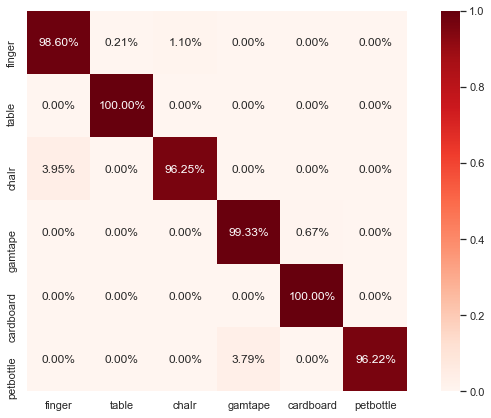

In [197]:
plt.figure(figsize = (12,7))
sns.heatmap(cd_df_kai.astype('float') / cd_df_kai.sum(axis=1), annot=True, fmt='.2%' ,square = True,cmap='Reds')
plt.show()

In [202]:
df_yubi2 = load("data_kai/finger.csv").iloc[7:,:]

In [203]:
x_yubi2 , y_yubi2 = get_xy(df_yubi2)

data must have only figure data


In [204]:
y_yubi2

7         95.703125
8         95.703125
9         93.750000
10        95.703125
11        93.750000
            ...    
10002    107.421875
10003    105.468750
10004    107.421875
10005    107.421875
10006    107.421875
Name: CH1, Length: 10000, dtype: object

In [205]:
#指のデータ
y_yubi2 = down_sampling(y_yubi2,10)

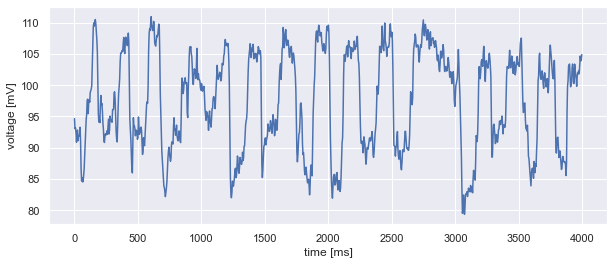

In [206]:
plot_time(y_yubi2,4,10)

In [208]:
y_yubi2 = np.array(y_yubi2).reshape(-1,1)

In [209]:
y_yubi2 = scale(y_yubi2)

In [210]:
a,y_yubi2 = np.array(y_yubi2)

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


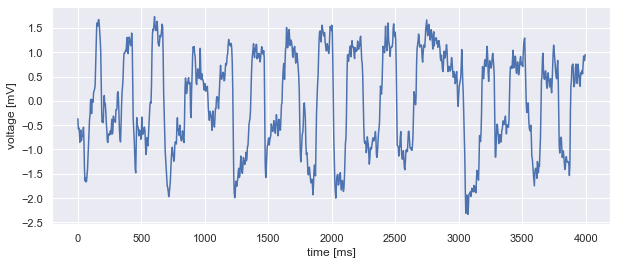

In [211]:
plot_time(y_yubi2,4,10)

In [217]:
#指のデータセット
data_yubi2,label_yubi2 = make_dataset(y_yubi2)

timesteps:100
label_num:0


In [218]:
label_yubi2 = label_yubi2.reshape(-1,1)

In [223]:
dammy = np.arange(1,6,1).reshape(-1,1)

In [224]:
dammy.shape

(5, 1)

In [225]:
label_yubi2k = np.vstack((label_yubi2,dammy))

In [226]:
label_yubi2k= one_hot(label_yubi2k)

In [228]:
label_yubi2k.shape

(905, 6)

In [237]:
label_yubi2kk = pd.DataFrame(label_yubi2k).iloc[:-5,:]

In [239]:
label_yubi2kk.shape

(900, 6)

In [240]:
evaluate_model(model_recicle,data_yubi2,label_yubi2kk)

29/29 [==============================] - 0s 15ms/step - loss: 5.8614 - accuracy: 0.0644
loss: 5.861442565917969 accuracy: 0.06444444507360458


In [378]:
evaluate_model(model_bi,data_yubi2,label_yubi2kk)

29/29 [==============================] - 0s 16ms/step - loss: 3.7077 - accuracy: 0.4111
loss: 3.707714080810547 accuracy: 0.41111111640930176


In [379]:
pp = model_bi.predict(data_yubi2)

In [380]:
y_predd = np.argmax(pp,axis=1)

In [381]:
y_predd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,